In [1]:
# !/usr/local/bin/python3.11 -m pip install ipympl

In [2]:
%matplotlib widget

In [3]:
from app.core.PoseHelper import PoseHelper
from app.core.SugesstionBuilder import SuggestionBuilder
import mediapipe as mp

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


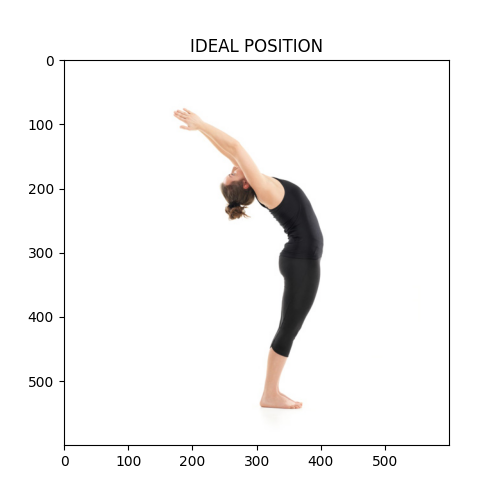

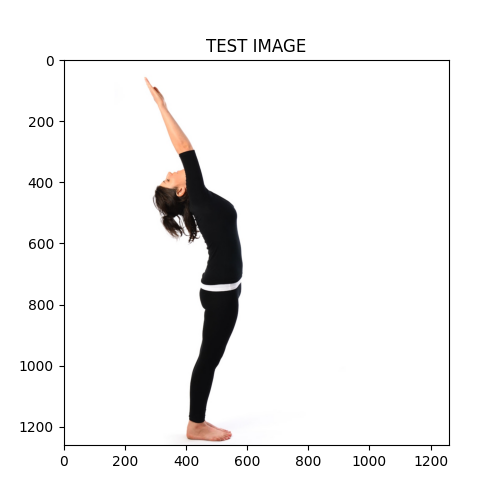

In [4]:
ideal = PoseHelper("app/media/hastauttanasana.jpg") # app/data/suryanamaskarsteps/02.hastauttasana.jpg")
# app/media/Pranamasana-train.png')
my_pose = PoseHelper("app/data/suryanamaskarsteps/02.hastauttasana.jpg") # app/media/00.a_pranamasana_side_view.jpeg")
# app/media/pranamasana_wrong.jpg")
ideal.display_img([5, 5], "IDEAL POSITION")
my_pose.display_img([5, 5], "TEST IMAGE")

Landmarks are extracted:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/google/protobuf/symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


NOSE:
[365.34820675849915, 355.2271431684494, -130.99707260727882]
LEFT_EYE_INNER:
[348.2677173614502, 373.15271615982056, -110.23449897766113]
LEFT_EYE:
[349.00465428829193, 376.5938079357147, -110.79059064388275]
LEFT_EYE_OUTER:
[349.6484649181366, 379.79780316352844, -110.55836632847786]
RIGHT_EYE_INNER:
[348.5718047618866, 374.72253262996674, -170.906563103199]
RIGHT_EYE:
[349.7723454236984, 378.6515986919403, -171.7233145236969]
RIGHT_EYE_OUTER:
[351.22842013835907, 382.6734906435013, -172.24245607852936]
LEFT_EAR:
[363.44647765159607, 404.3589252233505, 6.003575781360269]
RIGHT_EAR:
[368.3436441421509, 405.5044537782669, -272.61362224817276]
MOUTH_LEFT:
[388.37045431137085, 366.591255068779, -76.47697672247887]
MOUTH_RIGHT:
[390.05040764808655, 367.3094916343689, -160.80226600170135]
LEFT_SHOULDER:
[423.37478935718536, 453.60167026519775, 179.4437661767006]
RIGHT_SHOULDER:
[448.21709275245667, 439.13517594337463, -437.2227072715759]
LEFT_ELBOW:
[377.4970579147339, 294.15165066719

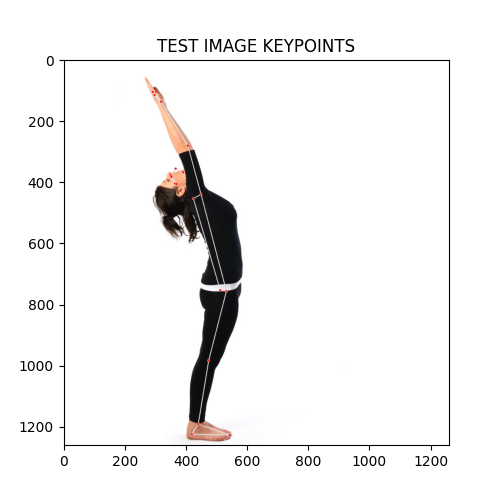

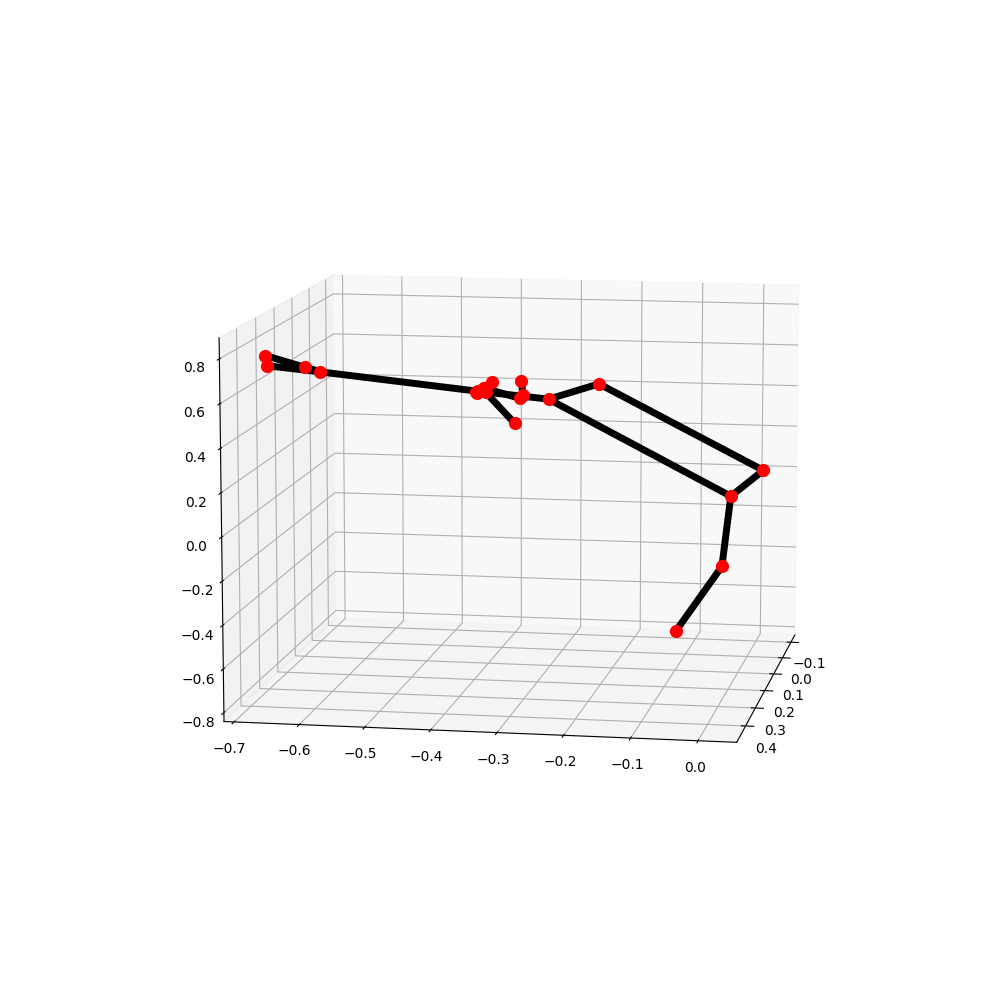

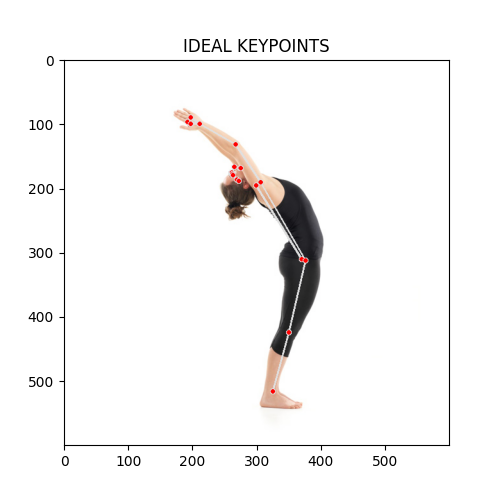

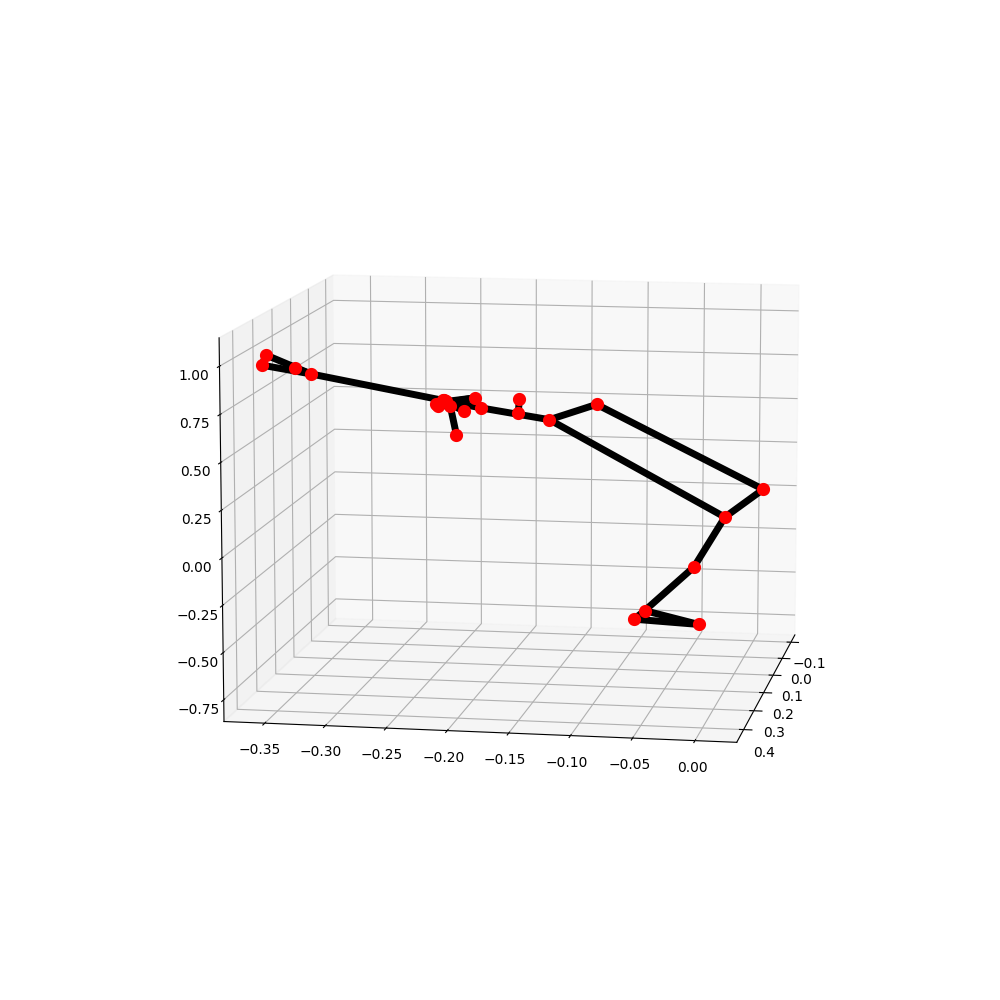

In [5]:
print("Landmarks are extracted:")
ideal.detect_keypoints(verbose=False)
my_pose.detect_keypoints(verbose=True)
my_pose.plot_keypoints2d(fig_title="TEST IMAGE KEYPOINTS")
ideal.plot_keypoints3d()
ideal.plot_keypoints2d(fig_title="IDEAL KEYPOINTS")
my_pose.plot_keypoints3d()

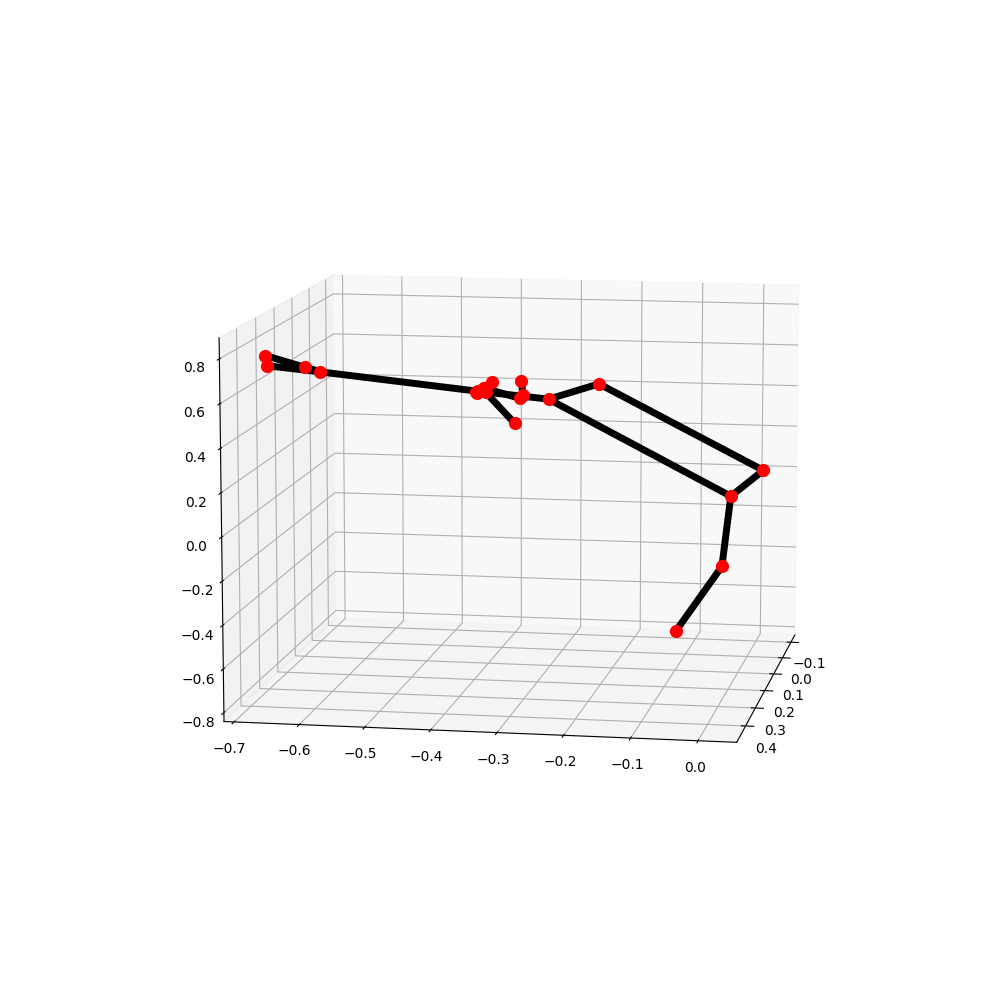

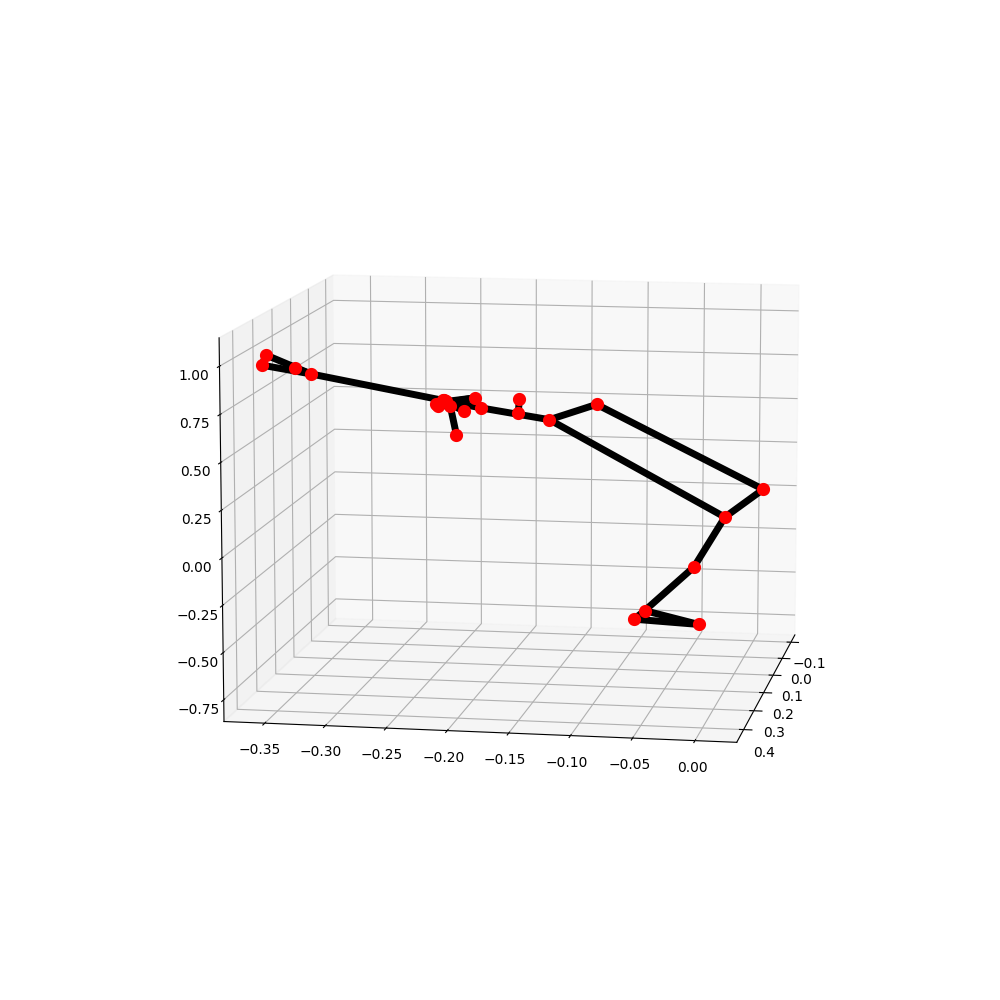

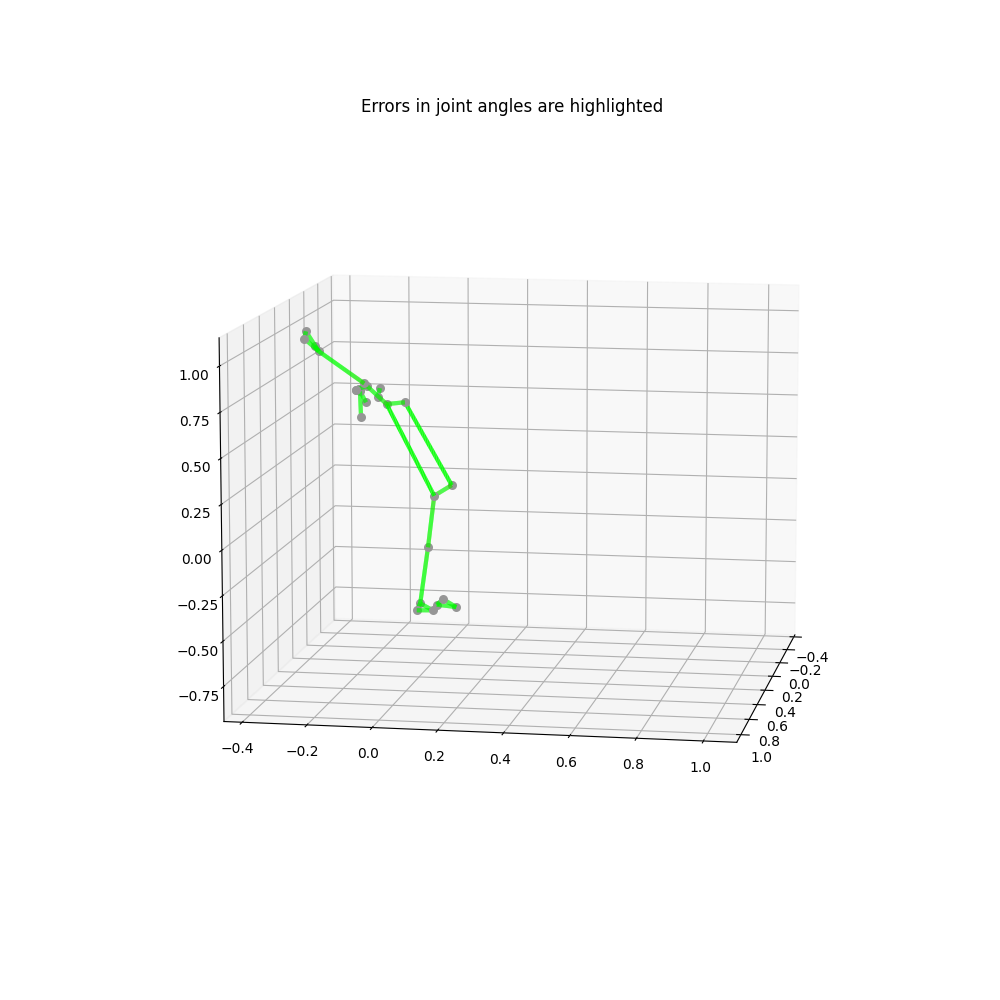

In [6]:
my_pose.calculate_angles()
ideal.calculate_angles()

ideal.plot_keypoints3d() #fig_title="IDEAL BODY POSITION")
my_pose.plot_keypoints3d() #fig_title="Test Body Position")
my_pose.draw3dErrorDetectedSkeleton(ideal,"Errors in joint angles are highlighted", pronounce_error_by=3,verbose=False)

In [7]:
arms_and_angles_diff = PoseHelper.calculate_angle_differences(
                    ideal.arms_and_angles, my_pose.arms_and_angles, 33
                )

In [8]:
suggestor = SuggestionBuilder()
print(suggestor.get_suggestions(arms_and_angles_diff))

[('LEFT_SHOULDER Perfect', 7.096982340128306), ('RIGHT_SHOULDER Perfect', 9.17553065744013), ('LEFT_ELBOW Good', 12.184341740321223), ('RIGHT_ELBOW Perfect', 9.637019494213941), ('LEFT_HIP Good', 16.86977159684985), ('RIGHT_HIP Good', 14.276816828874441), ('LEFT_KNEE Perfect', 1.822109982923435), ('RIGHT_KNEE Perfect', 6.924441334220885)]


In [9]:
# print(my_pose.arms_and_angles)
# from math import pi
# import math

# for i in range(len(my_pose.arms_and_angles)):
#     if(my_pose.arms_and_angles[i]):
#         for arms,angle in my_pose.arms_and_angles[i].items():
#             arms = list(arms)
#             print(f"for joint {i}.{my_pose.mp_pose.PoseLandmark(i).name} between {arms[0]}.{my_pose.mp_pose.PoseLandmark(arms[0]).name}  & {arms[1]}.{arms[0]}.{my_pose.mp_pose.PoseLandmark(arms[1]).name} angle: {math.degrees(angle)} degrees")

[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {frozenset({<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.LEFT_ELBOW: 13>}): array([ 1.69410093,  0.        , -0.        ])}, {frozenset({<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.RIGHT_ELBOW: 14>}): array([-1.46768615,  0.        , -0.        ])}, {frozenset({<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_WRIST: 15>}): array([-0.35221335,  0.        , -0.        ])}, {frozenset({<PoseLandmark.RIGHT_WRIST: 16>, <PoseLandmark.RIGHT_SHOULDER: 12>}): array([-0.44947437,  0.        , -0.        ])}, {}, {}, {}, {}, {}, {}, {}, {}, {frozenset({<PoseLandmark.RIGHT_HIP: 24>, <PoseLandmark.LEFT_KNEE: 25>}): array([ 0.7372537,  0.       , -0.       ])}, {frozenset({<PoseLandmark.RIGHT_KNEE: 26>, <PoseLandmark.LEFT_HIP: 23>}): array([ 0.76927048,  0.        , -0.        ])}, {frozenset({<PoseLandmark.LEFT_ANKLE: 27>, <PoseLandmark.LEFT_HIP: 23>}): array([ 0.04700136,  0.        , -0.        ])}, {frozenset({<PoseLandmark.RIGHT_HIP: 24>,

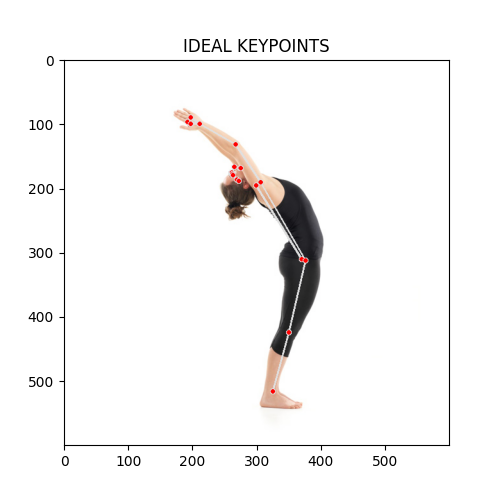

for joint 11.LEFT_SHOULDER between 12.RIGHT_SHOULDER  & 13.LEFT_ELBOW angle: [ 1.69410093  0.         -0.        ] radians
for joint 12.RIGHT_SHOULDER between 11.LEFT_SHOULDER  & 14.RIGHT_ELBOW angle: [-1.46768615  0.         -0.        ] radians
for joint 13.LEFT_ELBOW between 11.LEFT_SHOULDER  & 15.LEFT_WRIST angle: [-0.35221335  0.         -0.        ] radians
for joint 14.RIGHT_ELBOW between 16.RIGHT_WRIST  & 12.RIGHT_SHOULDER angle: [-0.44947437  0.         -0.        ] radians
for joint 23.LEFT_HIP between 24.RIGHT_HIP  & 25.LEFT_KNEE angle: [ 0.7372537  0.        -0.       ] radians
for joint 24.RIGHT_HIP between 26.RIGHT_KNEE  & 23.LEFT_HIP angle: [ 0.76927048  0.         -0.        ] radians
for joint 25.LEFT_KNEE between 27.LEFT_ANKLE  & 23.LEFT_HIP angle: [ 0.04700136  0.         -0.        ] radians
for joint 26.RIGHT_KNEE between 24.RIGHT_HIP  & 28.RIGHT_ANKLE angle: [ 0.03377602  0.         -0.        ] radians


In [10]:
print(ideal.arms_and_angles)
ideal.plot_keypoints2d(fig_title="IDEAL KEYPOINTS")
# ideal.detect_keypoints(verbose=True)
from math import pi
import math

multiplier = 1# 180/pi
for vertex in range(len(ideal.arms_and_angles)):
    if(ideal.arms_and_angles[vertex]):
        for arms,angle in ideal.arms_and_angles[vertex].items():
            arms = list(arms)
            print(f"for joint {vertex}.{ideal.mp_pose.PoseLandmark(vertex).name} between {arms[0]}.{ideal.mp_pose.PoseLandmark(arms[0]).name}  & {arms[1]}.{ideal.mp_pose.PoseLandmark(arms[1]).name} angle: {angle} radians")

In [11]:
from app.core.graphics.graphics_assistant import draw_error_landmarks_2d

n = 33
arms_and_angles_diff = PoseHelper.calculate_angle_differences(
    ideal.arms_and_angles, my_pose.arms_and_angles, n
)

img = my_pose.img.copy()
draw_error_landmarks_2d(
    arms_and_angles_diff=arms_and_angles_diff,
    img=img,
    landmark_list=my_pose.results.pose_landmarks,
    pronounce_error_by= 4,
    connections=my_pose.mp_pose.POSE_CONNECTIONS,
    verbose=False,
    drawing_spec_radius=7
)

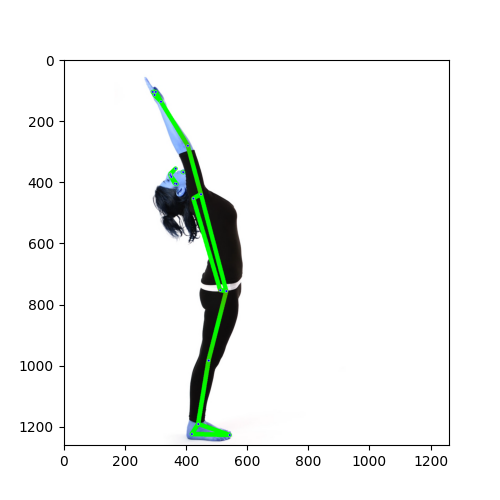

In [12]:
import matplotlib.pyplot as plt
fig_title=""
figsize=[5, 5]
fig = plt.figure(figsize=figsize)
plt.title(fig_title)
plt.imshow(img)
plt.show()

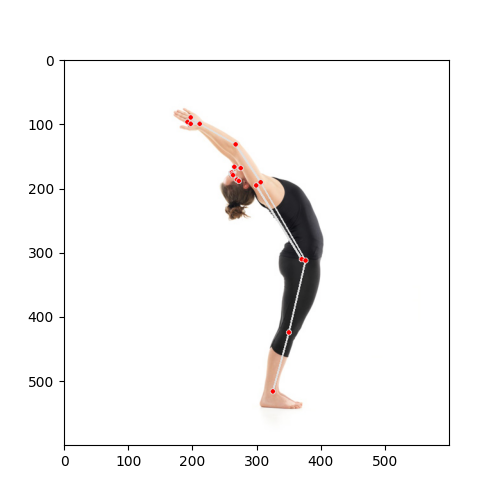

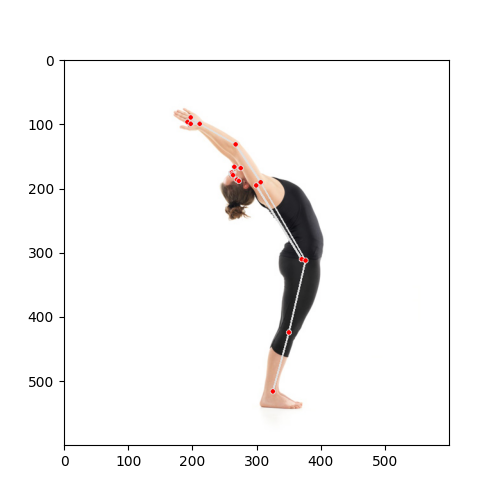

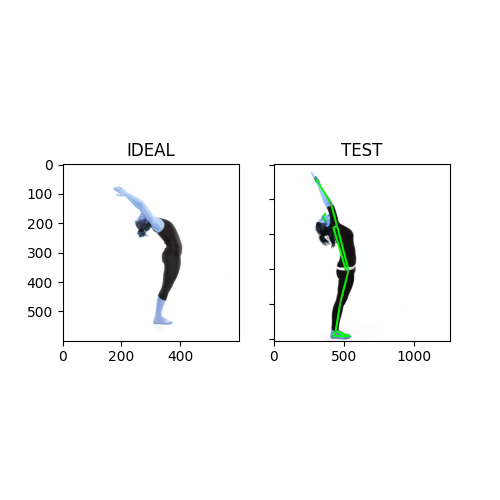

In [13]:
fig, axs = plt.subplots(1, 2, figsize=figsize)
fig.suptitle(fig_title)
axs[0].imshow(ideal.img)
axs[1].imshow(img)
axs[0].set_title("IDEAL")
axs[1].set_title("TEST")
for ax in axs.flat:
    ax.label_outer()
# fig.tight_layout()
ideal.plot_keypoints2d()
plt.show()

Evaluation of pose using words:

In [14]:
suggester = SuggestionBuilder()
suggestions = suggester.get_suggestions(arms_and_angles_diff)
suggestions.sort(key=lambda x: x[1], reverse=True)
print("\n".join([f"{s[0]}" for s in suggestions]))

LEFT_HIP Good
RIGHT_HIP Good
LEFT_ELBOW Good
RIGHT_ELBOW Perfect
RIGHT_SHOULDER Perfect
LEFT_SHOULDER Perfect
RIGHT_KNEE Perfect
LEFT_KNEE Perfect
